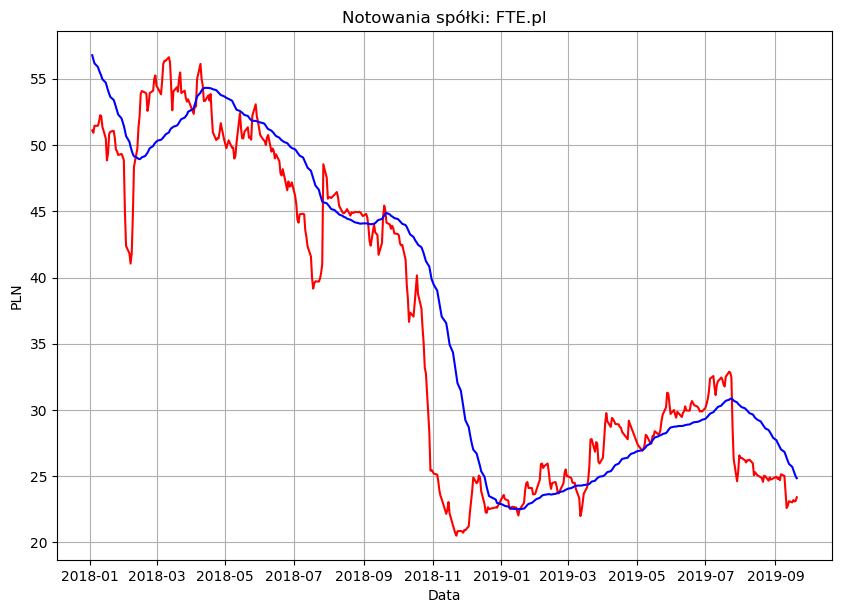

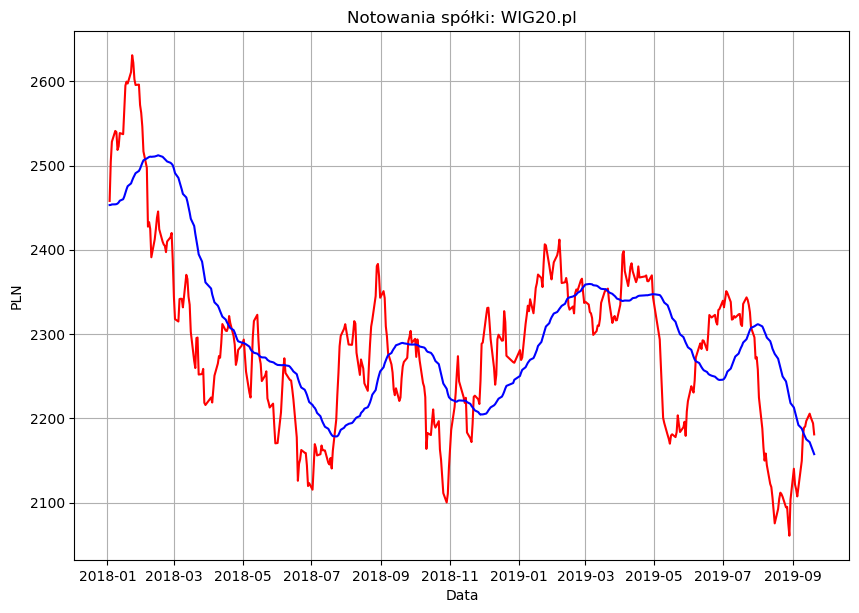

In [4]:
from datetime import datetime
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()
import os
import smtplib
import imghdr
from email.message import EmailMessage

# time_from = datetime.now()
# print(time_from)

def modify_source(csv_file):
    result = csv_file.reset_index()
    return result

def mean_seirie():
    df['Mean'] = (df['High'] + df['Low'] + df['Open'] + df['Close']) / 4

    
def sma():
    k = 40
    df['SMA'] = df['Mean'].rolling(window=k).mean().shift(1-k)


def go_mail():
    contacts = ['tom4net@me.com']

    EMAIL_ADDRESS = os.environ.get('EMAIL_USER')
    EMAIL_PASSWORD = os.environ.get('EMAIL_PASS')

    msg = EmailMessage()
    msg['Subject'] = 'Test generowania wykresow ze strony Stooq.com'
    msg['From'] = EMAIL_ADDRESS
    msg['To'] = contacts
    msg.set_content('Ja Ci się podoba mój automatyczny generator wykresów?')

    msg.add_alternative("""\
    <!DOCTYPE html>
    <html>
        <body>
            <h1 style="color:SlateGray;">Oto wykresy wybranych spółek</h1>
        </body>
    </html>
    """, subtype='html')

    path = 'charts/'

    files = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if '.png' in file:
                files.append(os.path.join(r, file))

    for file in files:
        with open(file, 'rb') as f:
            file_data = f.read()
            file_type = imghdr.what(f.name)
            file_name = f.name

        msg.add_attachment(file_data, maintype='image', subtype=file_type, filename=file_name)

    with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
        smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)

        smtp.send_message(msg)
    
for symbol in ['FTE.pl', 'WIG20.pl']:
#     symbol = input("Wprowadż symbol akcji lub indeksu: ") 
    df = web.DataReader(symbol, 'stooq')
    df = modify_source(df)
    mean_seirie()
    sma()
    # date_from = input('Pokaż notowania od (RRRR-MM-DD): ')
    data_from = df.loc[df['Date'] >= '2018-01-01']
    x = list(data_from['Date'])
    y = list(data_from['Mean'])
    z = list(data_from['SMA'])
    plt.figure(figsize=(10,7), dpi=100)
    plt.plot(x, y, color='red', marker='', linestyle='solid', label='mean price')
    plt.plot(x, z, color='blue', marker='', linestyle='solid', label='SMA')
    plt.title("Notowania spółki: {}".format(symbol))
    plt.ylabel('PLN')
    plt.xlabel("Data")
    plt.grid()
    plt.savefig('charts/{}.png'.format(symbol))
    plt.show()

# go_mail()

# time_to = datetime.now()
# print(time_to)
# print(time_to - time_from)

In [5]:
# inne indeksy do testów:
# 'FTE.pl', 'WIG20.pl', 'CCC.pl', 'ENA.pl', 'EUR.pl', 'ING.pl', 'KGH.pl', 'LTS.pl', 'PEO.pl', 'PGE.pl', 'PKN.pl', 'PKO.pl', 'PZU.pl', 'LPP.pl', 'MBK.pl', 'JSW.pl', 'KRU.pl', 'MIL.pl'

In [3]:
import os
import smtplib
import imghdr
from email.message import EmailMessage
# import config


def go_mail():
    contacts = ['tom4net@me.com']


    EMAIL_ADDRESS = os.environ.get('EMAIL_USER')
    EMAIL_PASSWORD = os.environ.get('EMAIL_PASS')


    msg = EmailMessage()
    msg['Subject'] = 'Test generowania wykresow ze strony Stooq.com'
    msg['From'] = EMAIL_ADDRESS
    msg['To'] = contacts
    msg.set_content('Ja Ci się podoba mój automatyczny generator wykresów?')

    msg.add_alternative("""\
    <!DOCTYPE html>
    <html>
        <body>
            <h1 style="color:SlateGray;">Oto wykresy wybranych spółek</h1>
        </body>
    </html>
    """, subtype='html')

    path = 'charts/'

    files = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if '.png' in file:
                files.append(os.path.join(r, file))

    for file in files:
        with open(file, 'rb') as f:
            file_data = f.read()
            file_type = imghdr.what(f.name)
            file_name = f.name

        msg.add_attachment(file_data, maintype='image', subtype=file_type, filename=file_name)

    with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
        smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)

        smtp.send_message(msg)
go_mail()

In [47]:
import os
import glob

# os.getcwd()
os.chdir('charts/')
files = [f for f in glob.glob("*.png", recursive=True)]
# print(files)
os.chdir("..")

['WIG20.pl.png', 'FTE.pl.png']


In [33]:
from pathlib import Path

for filename in Path('charts/').glob('*.png'):
    print(filename)

charts/WIG20.pl.png
charts/FTE.pl.png


In [50]:
import os

path = 'charts'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.png' in file:
            files.append(os.path.join(r, file))
print(files)


['charts/WIG20.pl.png', 'charts/FTE.pl.png']


In [1]:
import quandl
mydata = quandl.get("WSE/FORTE")
print(mydata.tail())

             Open   High   Low  Close  %Change  Volume  # of Trades  \
Date                                                                  
2019-09-13  23.55  23.70  22.5  22.70    -2.16  7755.0         53.0   
2019-09-16  22.60  23.50  22.5  23.50     3.52  9710.0         84.0   
2019-09-17  23.50  23.65  22.7  22.95    -2.34  4388.0         51.0   
2019-09-18  22.30  23.90  22.3  23.90     4.14  2717.0         55.0   
2019-09-19  23.00  23.50  22.8  23.25    -2.72  4572.0         62.0   

            Turnover (1000)  
Date                         
2019-09-13           177.10  
2019-09-16           224.43  
2019-09-17           100.41  
2019-09-18            63.85  
2019-09-19           105.79  
